<a href="https://colab.research.google.com/github/m-bashari-m/vehicle-color-recognition/blob/main/src/11_combined_model_v2_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py

--2022-07-28 03:22:56--  https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11848 (12K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]  11.57K  --.-KB/s    in 0s      

2022-07-28 03:22:56 (81.1 MB/s) - ‘utils.py’ saved [11848/11848]



In [2]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [3]:
import os

import tensorflow as tf
from tensorflow import keras

from utils import get_train_val_ds, ErrorAnalyzer, get_class_weight, get_model

In [4]:
BATCH_SIZE = 64
IMG_SIZE = (256, 256)
AUTOTUNE = tf.data.AUTOTUNE
N_CLASSES = 16

In [5]:
dataset_dir = os.path.join('drive', 'MyDrive', 'data')
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

In [6]:
_, val_ds = get_train_val_ds(train_dir, val_dir, batch_size=BATCH_SIZE, img_size=IMG_SIZE)

Found 20092 files belonging to 16 classes.
Found 3495 files belonging to 16 classes.


In [7]:
classes, _ = get_class_weight()

In [8]:
file_paths = val_ds.file_paths

In [9]:
rgb_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [10]:
model = get_model('combined-v2-aug')

In [11]:
analyzer = ErrorAnalyzer(model=model,
                         ds=rgb_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='combined-v2')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


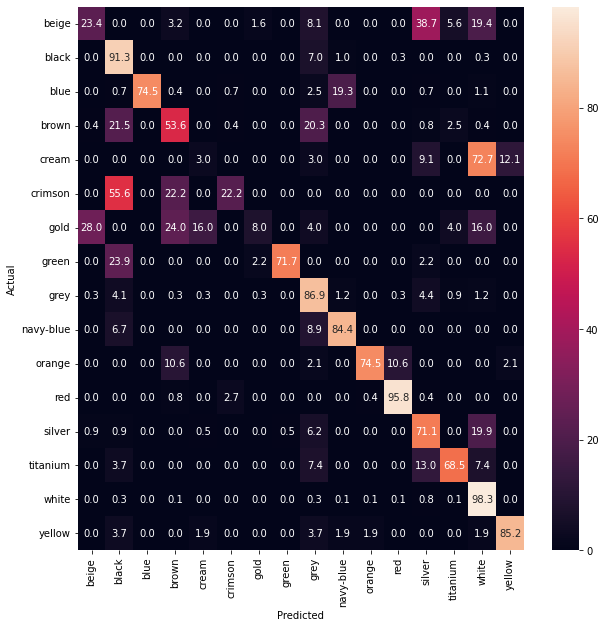

In [12]:
analyzer.plot_confusion_mat()

In [13]:
analyzer.evaluate_model()

Calculateing error types...
Writing in log file...
All done. Check log file => combined-v2.csv
Accuracy: %83.91999999999999
Precision mean: 0.6891
Recall mean: 0.6328


In [14]:
!zip -r combined-v2-stats.zip ./logs/statistic 

from google.colab import files
files.download('combined-v2-stats.zip')

  adding: logs/statistic/ (stored 0%)
  adding: logs/statistic/images/ (stored 0%)
  adding: logs/statistic/images/combined-v2.jpg (deflated 16%)
  adding: logs/statistic/combined-v2-conf-mat.npy (deflated 76%)
  adding: logs/statistic/combined-v2.csv (deflated 47%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>